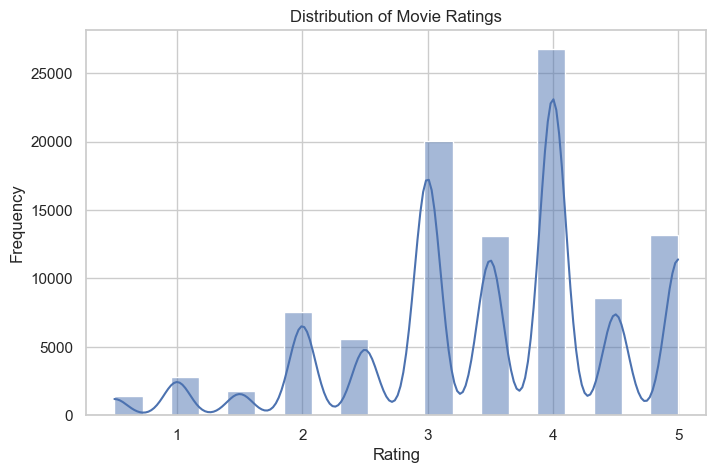

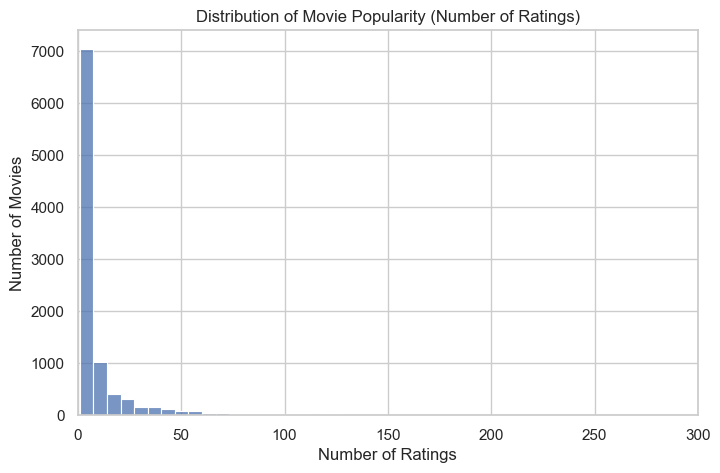

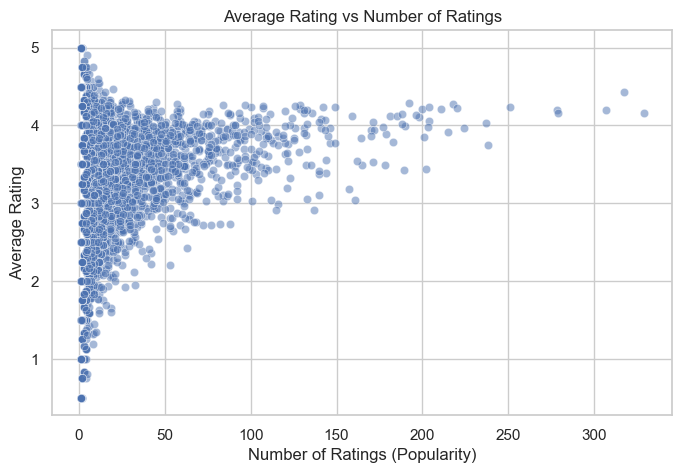

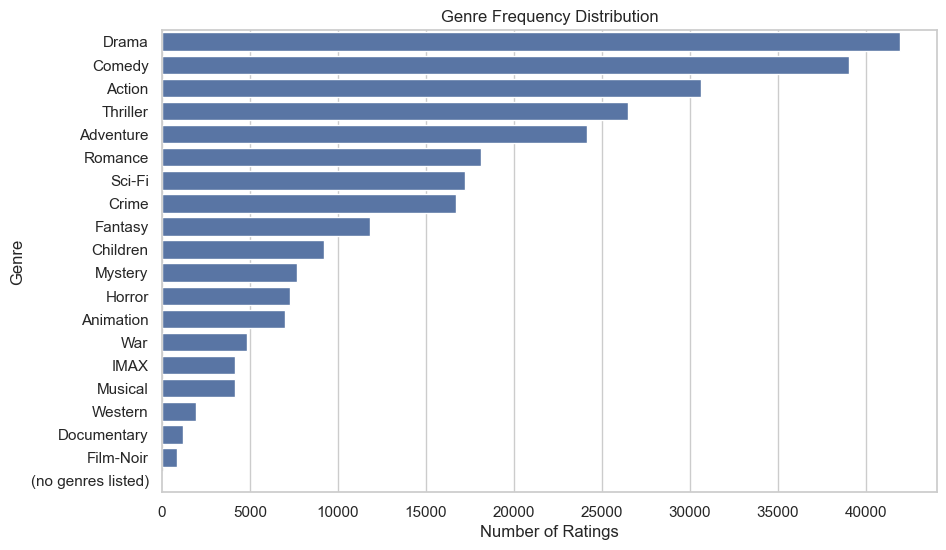

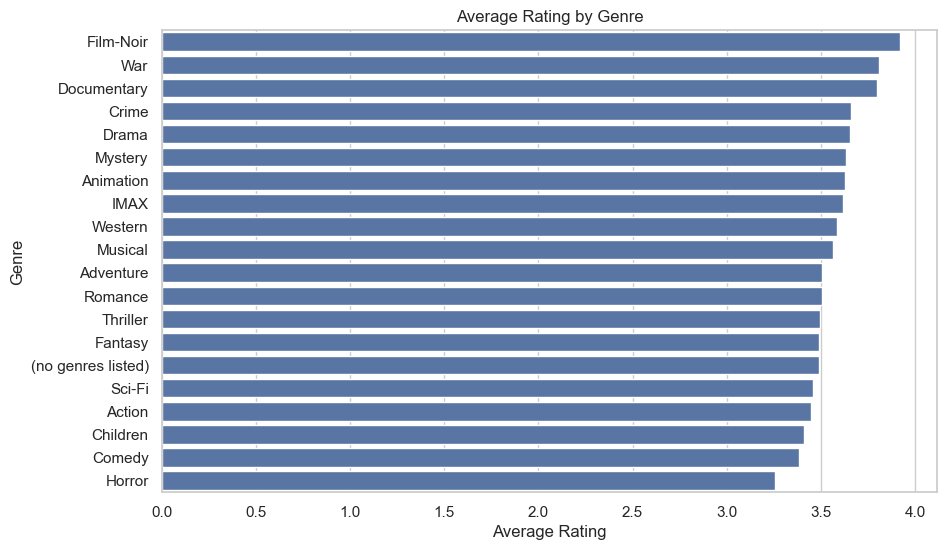

In [1]:
# ============================================================
# Movie Recommendation System (Content-Based)
# Phase 2: Exploratory Data Analysis (EDA)
# ============================================================
#
# Objective of this phase:
# - Understand rating behavior
# - Analyze popularity patterns
# - Explore genre distributions
# - Identify relationships and biases in data
#
# No modeling or similarity computation yet.
# ============================================================


# -----------------------------
# Import Required Libraries
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


# -----------------------------
# Load Merged Dataset
# -----------------------------

# Load merged dataset from Phase 1
merged_df = pd.read_csv("../data/merged_movies_ratings.csv") if False else None
# NOTE:
# If you did NOT save merged_df earlier, re-create it here
# by reloading movies.csv and ratings.csv

movies_df = pd.read_csv("../data/movies.csv")
ratings_df = pd.read_csv("../data/ratings.csv")

merged_df = pd.merge(ratings_df, movies_df, on="movieId", how="inner")


# ============================================================
# 1️⃣ Rating Distribution Analysis
# ============================================================

# -----------------------------
# Histogram of Ratings
# -----------------------------

plt.figure(figsize=(8, 5))

sns.histplot(
    merged_df['rating'],
    bins=20,
    kde=True
)

plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 🔎 INSIGHT:
# - Ratings are not uniformly distributed
# - Most ratings cluster between 3.0 and 4.0
# - Suggests positive rating bias in users


# ============================================================
# 2️⃣ Movie Popularity Analysis
# ============================================================

# -----------------------------
# Number of ratings per movie
# -----------------------------

movie_rating_count = (
    merged_df
    .groupby('title')
    .size()
    .reset_index(name='rating_count')
)

movie_rating_count.describe()

# 🔎 INSIGHT:
# - Most movies receive very few ratings
# - A small number of movies dominate user attention


# -----------------------------
# Popularity Distribution
# -----------------------------

plt.figure(figsize=(8, 5))

sns.histplot(
    movie_rating_count['rating_count'],
    bins=50,
    kde=False
)

plt.title("Distribution of Movie Popularity (Number of Ratings)")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.xlim(0, 300)  # limit for readability
plt.show()

# 🔎 INSIGHT:
# - Highly skewed distribution
# - Long-tail behavior (classic recommender system pattern)


# ============================================================
# 3️⃣ Average Rating vs Popularity
# ============================================================

# -----------------------------
# Compute average rating per movie
# -----------------------------

movie_stats = (
    merged_df
    .groupby('title')
    .agg(
        avg_rating=('rating', 'mean'),
        rating_count=('rating', 'count')
    )
    .reset_index()
)

# -----------------------------
# Scatter plot: Popularity vs Rating
# -----------------------------

plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=movie_stats,
    x='rating_count',
    y='avg_rating',
    alpha=0.5
)

plt.title("Average Rating vs Number of Ratings")
plt.xlabel("Number of Ratings (Popularity)")
plt.ylabel("Average Rating")
plt.show()

# 🔎 INSIGHT:
# - Movies with very few ratings show extreme averages
# - More reliable ratings appear as rating_count increases


# ============================================================
# 4️⃣ Genre Analysis
# ============================================================

# -----------------------------
# Split genre strings into individual rows
# -----------------------------

genres_df = merged_df.copy()

# Convert 'Action|Comedy|Drama' → ['Action', 'Comedy', 'Drama']
genres_df['genres'] = genres_df['genres'].str.split('|')

# Explode genres into separate rows
genres_df = genres_df.explode('genres')

# -----------------------------
# Genre Frequency
# -----------------------------

genre_counts = genres_df['genres'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(
    x=genre_counts.values,
    y=genre_counts.index
)

plt.title("Genre Frequency Distribution")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.show()

# 🔎 INSIGHT:
# - Drama, Comedy, and Action dominate the dataset
# - Niche genres have very limited representation


# ============================================================
# 5️⃣ Genre vs Rating Behavior
# ============================================================

# -----------------------------
# Average rating per genre
# -----------------------------

genre_rating_stats = (
    genres_df
    .groupby('genres')['rating']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=genre_rating_stats.values,
    y=genre_rating_stats.index
)

plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

# 🔎 INSIGHT:
# - Certain genres consistently receive higher ratings
# - This motivates hypothesis testing in Phase 3


# ============================================================
# End of Phase 2
#
# Key Takeaways:
# - Rating distributions are skewed
# - Popularity bias exists
# - Genre dominance affects recommendations
# - Statistical assumptions are now testable
# ============================================================
